# **# Pneumonia classification deep learning project**

In [1]:

# importing libraries

# numerical and data manipulation libraries
import numpy as np
import pandas as pd

# data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# evaluation metrics and class balancing
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# deep learning frameworks
import keras
import tensorflow as tf

# image preprocessing tools
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import save_model

# model architecture and training utilities
from tensorflow.keras.models import Sequential, load_model, save_model
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D,Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [2]:
! pip install opendatasets

In [3]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: shekhar1207
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia


100%|██████████| 2.29G/2.29G [00:12<00:00, 196MB/s] 


In [4]:
# Remove the directory and its contents recursively using the shell command 'rm -r'
! rm -r /content/chest-xray-pneumonia/chest_xray/chest_xray

In [5]:
# Remove the directory and its contents recursively using the shell command 'rm -r'
! rm -r /content/chest-xray-pneumonia/chest_xray/__MACOSX

In [25]:
# dataset paths
train_path = '/content/chest-xray-pneumonia/chest_xray/train'
test_path = '/content/chest-xray-pneumonia/chest_xray/test'
valid_path = '/content/chest-xray-pneumonia/chest_xray/val'

# define standard parameter values
batch_size = 32
img_height = 128
img_width = 128

In [26]:
# data augmentation for training images
image_gen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# rescaling for test images (no augmentation)
test_data_gen = ImageDataGenerator(rescale=1./255)

# rescaling for validation images (no augmentation)
valid_data_gen = ImageDataGenerator(rescale=1./255)

In [27]:
# load and preprocess training images with augmentation
train = image_gen.flow_from_directory(
    train_path,
    target_size=(img_height, img_width),
    class_mode='binary',
    batch_size=batch_size
)

# load and preprocess test images (no augmentation, no shuffle)
test = test_data_gen.flow_from_directory(
    test_path,
    target_size=(img_height, img_width),
    shuffle=False,
    class_mode='binary',
    batch_size=batch_size
)

# load and preprocess validation images (no augmentation)
valid = test_data_gen.flow_from_directory(
    valid_path,
    target_size=(img_height, img_width),
    class_mode='binary',
    batch_size=batch_size
)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [28]:
# define a custom Sequential Convolutional Neural Network (CNN)
model_cnn = Sequential()

# first convolutional layer with 32 filters, 3x3 kernel, ReLU activation
model_cnn.add(Conv2D(32, (3, 3), activation="relu", input_shape=(img_width, img_height, 3)))
model_cnn.add(MaxPooling2D(pool_size=(2, 2)))  # downsampling

# second convolutional layer with 32 filters
model_cnn.add(Conv2D(64, (3, 3), activation="relu"))
model_cnn.add(MaxPooling2D(pool_size=(2, 2)))

# third convolutional layer with 32 filters
model_cnn.add(Conv2D(64, (3, 3), activation="relu"))
model_cnn.add(MaxPooling2D(pool_size=(2, 2)))

# fourth convolutional layer with 64 filters
model_cnn.add(Conv2D(128, (3, 3), activation="relu"))
model_cnn.add(MaxPooling2D(pool_size=(2, 2)))

# fifth convolutional layer with 64 filters
model_cnn.add(Conv2D(128, (3, 3), activation="relu"))
model_cnn.add(MaxPooling2D(pool_size=(2, 2)))



# flatten the output before passing to dense layers
model_cnn.add(Flatten())

# fully connected layer with 128 units
model_cnn.add(Dense(128, activation='relu'))
# Add Dropout as a layer using .add()
model_cnn.add(Dropout(0.2))

# fully connected layer with 64 units
model_cnn.add(Dense(64, activation='relu'))
# Add Dropout as a layer using .add()
model_cnn.add(Dropout(0.2))

# output layer with sigmoid activation for binary classification
model_cnn.add(Dense(1, activation='sigmoid'))

# compile the model using Adam optimizer and binary cross-entropy loss
model_cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# display the model architecture summary
model_cnn.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 4, 4, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 351,745 (1.34 MB)

 Trainable params: 351,745 (1.34 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
# define early stopping to prevent overfitting by monitoring validation loss
early = EarlyStopping(
    monitor="val_loss",
    mode="min",
    patience=5
)

# reduce learning rate when validation loss plateaus
learning_rate_reduction = ReduceLROnPlateau(
    monitor='val_loss',
    patience=2,
    verbose=1,
    factor=0.3,
    min_lr=1e-6
)

# compute class weights to handle imbalanced dataset
weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train.classes),
    y=train.classes
)

# convert weights to dictionary format expected by Keras
cw = dict(zip(np.unique(train.classes), weights))

In [30]:
%%time

# define a list of callbacks (can be passed to .fit if needed)
callbacks_list = [early, learning_rate_reduction]
# callbacks = callbacks_list

# train the CNN model
history_cnn = model_cnn.fit(
    train,
    epochs=50,
    validation_data=test,
    class_weight=cw ,   # apply class weighting to handle imbalance
    steps_per_epoch=train.samples // train.batch_size,
    callbacks=callbacks_list  # optionally include callbacks
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 71s 398ms/step - accuracy: 0.4674 - loss: 0.6461 - val_accuracy: 0.7131 - val_loss: 0.5131 - learning_rate: 0.0010
Epoch 2/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 76s 387ms/step - accuracy: 0.8596 - loss: 0.3013 - val_accuracy: 0.8830 - val_loss: 0.3094 - learning_rate: 0.0010
Epoch 3/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 82s 387ms/step - accuracy: 0.8951 - loss: 0.2495 - val_accuracy: 0.9087 - val_loss: 0.2859 - learning_rate: 0.0010
Epoch 4/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 63s 385ms/step - accuracy: 0.9108 - loss: 0.2167 - val_accuracy: 0.8958 - val_loss: 0.3502 - learning_rate: 0.0010
Epoch 5/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 63s 384ms/step - accuracy: 0.9249 - loss: 0.2007 - val_accuracy: 0.9231 - val_loss: 0.2627 - learning_rate: 0.0010
Epoch 6/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 82s 384ms/step - accuracy: 0.9269 - loss: 0.1753 - val_accuracy: 0.9022 - val_loss: 0.3682 - learning_rate: 0.0010
Epoch 7/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step - accuracy: 0.93

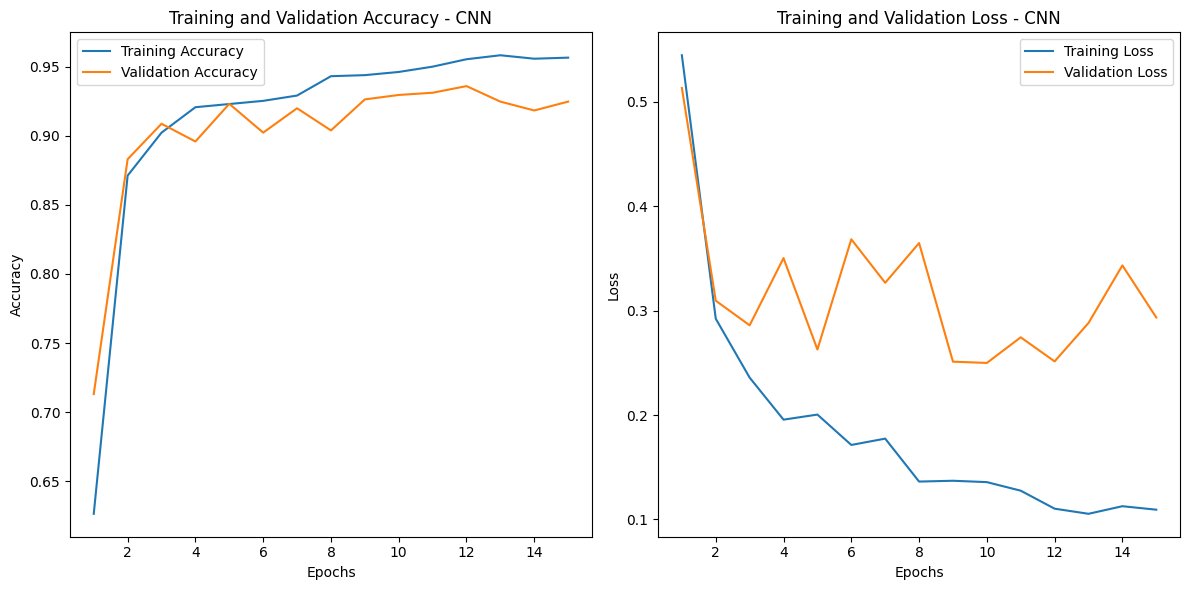

In [31]:
# function to plot training and validation accuracy/loss over epochs
def plot_training_history(history):
    # extract training and validation metrics from history object
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 6))

    # plot training and validation accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, label='Training Accuracy')
    plt.plot(epochs, val_acc, label='Validation Accuracy')
    plt.title('Training and Validation Accuracy - CNN')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()


    # plot training and validation loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, label='Training Loss')
    plt.plot(epochs, val_loss, label='Validation Loss')
    plt.title('Training and Validation Loss - CNN')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# call the function to display training history plots
plot_training_history(history_cnn)

In [32]:
# define file path for saving the model in .keras format (recommended for TensorFlow 2.x+)
fp = "cnn_pneu_vamp_model.keras"
model_cnn.save(fp)  # save model in the newer .keras format

# load the saved model from the .keras file
cnn = load_model(fp)

# save the model in HDF5 (.h5) format for compatibility with older tools
model_cnn.save('CNN_Classification_1.h5')

# alternative way to save using save_model() function explicitly
save_model(model_cnn, 'CNN_Classification_2.h5')

In [33]:
preds = cnn.predict(test,verbose=1)


20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 223ms/step


In [34]:
test_accu = cnn.evaluate(test)
print('The testing accuracy is :',test_accu[1]*100, '%')

20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 182ms/step - accuracy: 0.8910 - loss: 0.4524
The testing accuracy is : 92.46794581413269 %


In [35]:
#convert predicted probabilities to binary class labels (threshold at 0.5)
predictions = preds.copy()
predictions[predictions <= 0.5] = 0
predictions[predictions > 0.5] = 1

# reset the test generator so it starts from the beginning
test.reset()

# concatenate all images and true labels from the test generator
x = np.concatenate([test.__next__()[0] for i in range(len(test))])  # all test images
y = np.concatenate([test.__next__()[1] for i in range(len(test))])  # all ground truth labels

# print shapes for confirmation
print(x.shape)  # shape: (num_samples, height, width, channels)
print(y.shape)  # shape: (num_samples,)

(624, 128, 128, 3)
(624,)


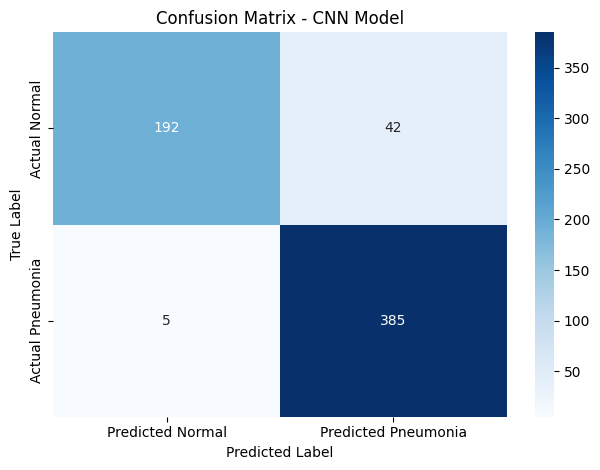

In [36]:
# create a confusion matrix DataFrame
cm = pd.DataFrame(
    data=confusion_matrix(test.classes, predictions, labels=[0, 1]),
    index=["Actual Normal", "Actual Pneumonia"],         # true labels
    columns=["Predicted Normal", "Predicted Pneumonia"]  # predicted labels
)

# plot the confusion matrix using seaborn
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - CNN Model")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

In [37]:
# generate a classification report including precision, recall, F1-score, and support for each class
print(classification_report(
    y_true=test.classes,          # true labels from the test set
    y_pred=predictions,           # predicted labels from the model
    target_names=['NORMAL', 'PNEUMONIA']  # human-readable class names
))

              precision    recall  f1-score   support

      NORMAL       0.97      0.82      0.89       234
   PNEUMONIA       0.90      0.99      0.94       390

    accuracy                           0.92       624
   macro avg       0.94      0.90      0.92       624
weighted avg       0.93      0.92      0.92       624



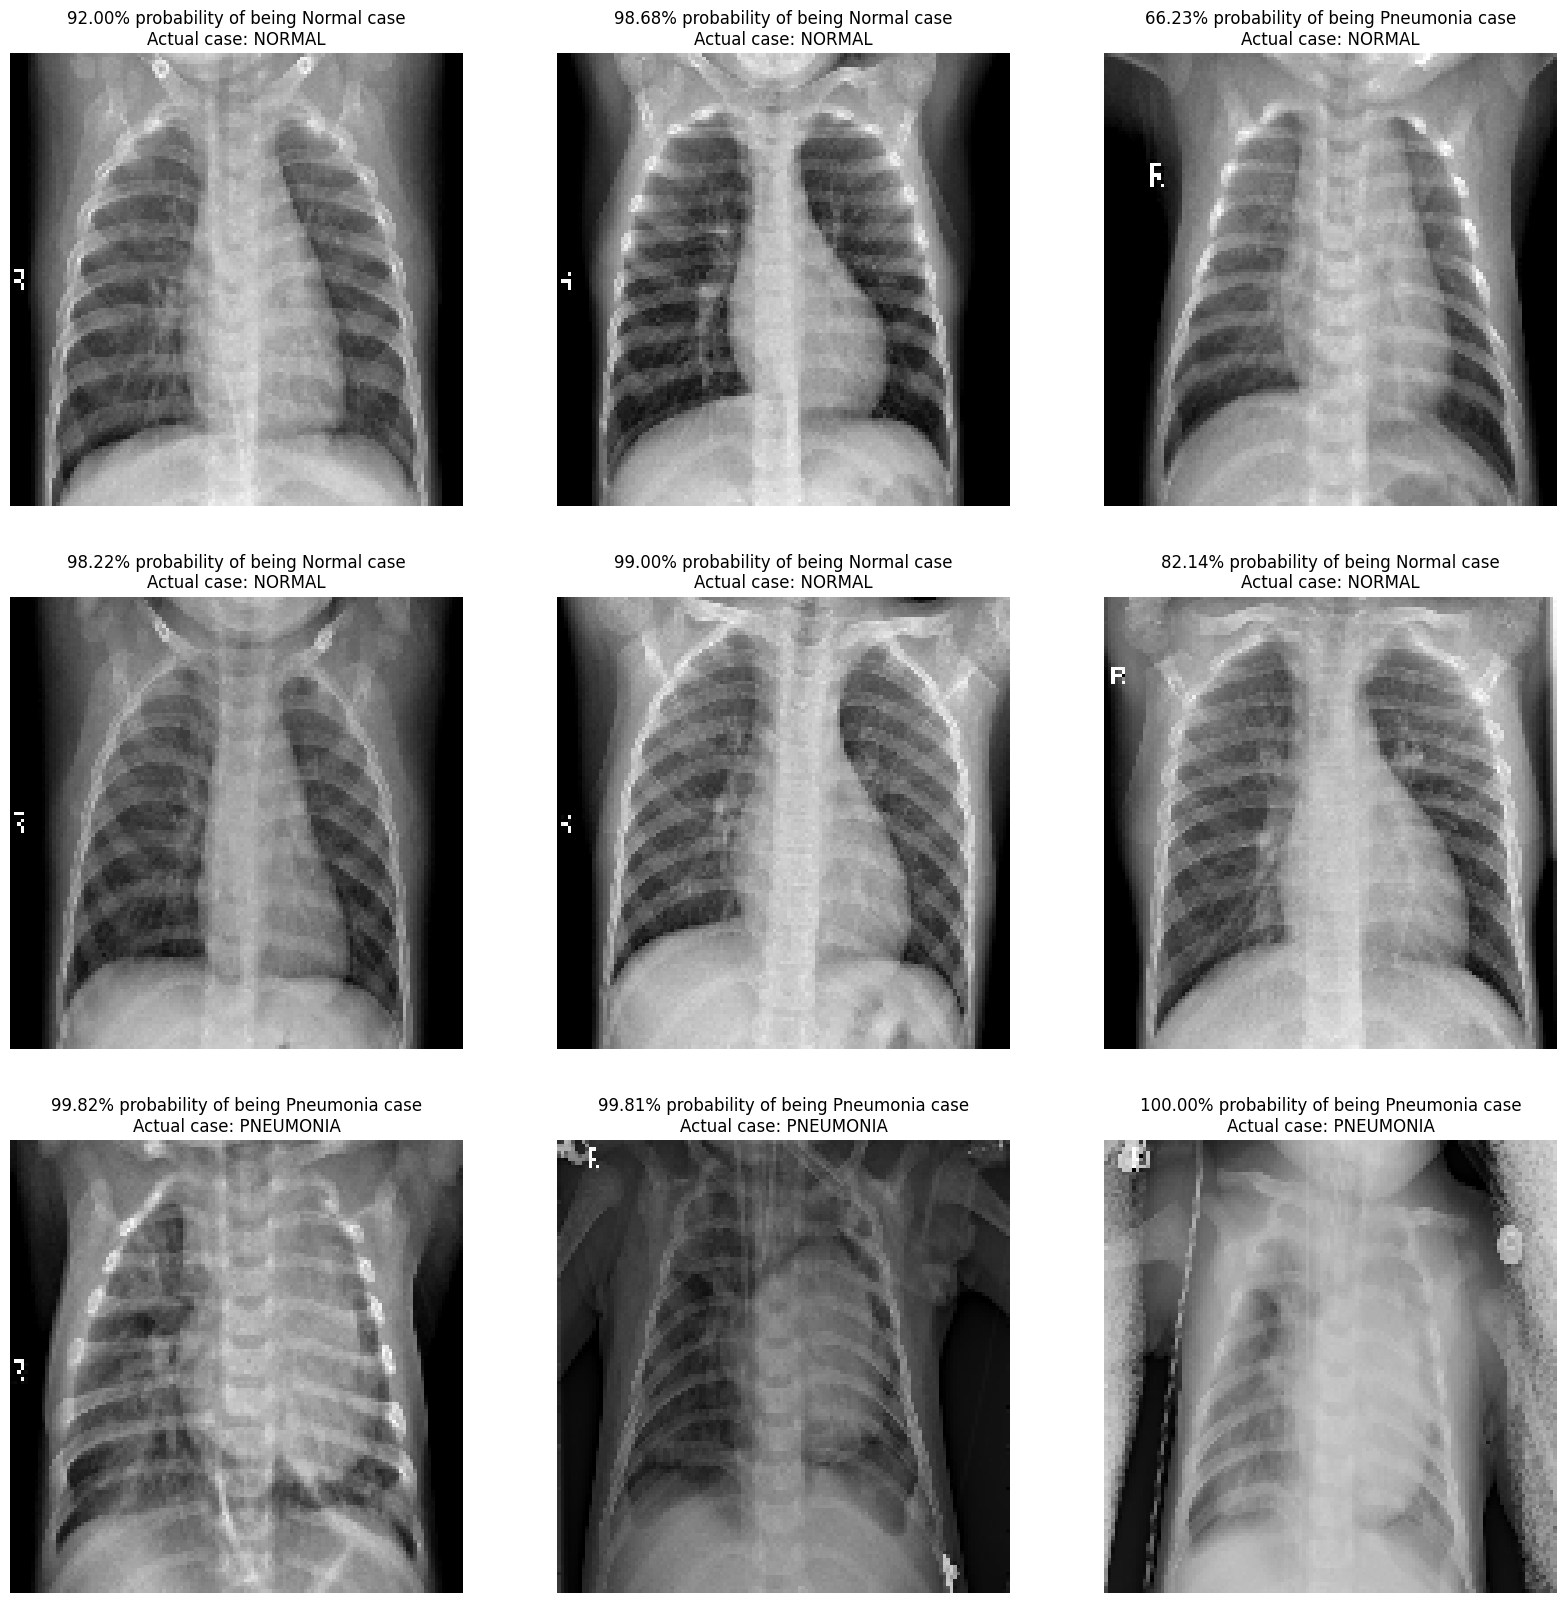

In [38]:
# dictionary to map class labels to readable text
dic = {0: 'NORMAL', 1: 'PNEUMONIA'}

# set up the figure size for displaying images
plt.figure(figsize=(20, 20))

# loop through 9 test images starting from index 228
for i in range(0 + 228, 9 + 228):
    plt.subplot(3, 3, (i - 228) + 1)  # create a 3x3 grid of subplots

    # generate prediction text with probability
    if preds[i, 0] >= 0.5:
        out = '{:.2%} probability of being Pneumonia case'.format(preds[i][0])
    else:
        out = '{:.2%} probability of being Normal case'.format(1 - preds[i][0])

    # set the title with predicted probability and actual class label
    plt.title(out + "\nActual case: " + dic.get(y[i]))

    # display the image (remove singleton dimension)
    plt.imshow(np.squeeze(x[i]), cmap='gray')
    plt.axis('off')

# display the full grid
plt.show()